In [1]:
__author__ = "Phillip Lakaschus"
__email__ = "lakaschus@th.physik.uni-frankfurt.de"

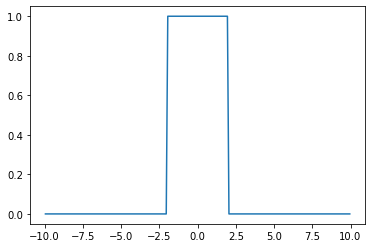

0.03699946403503418


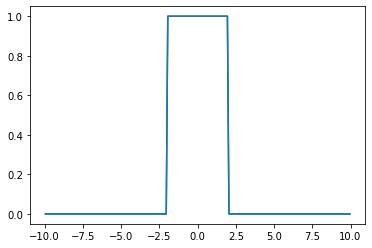

time:  0.0


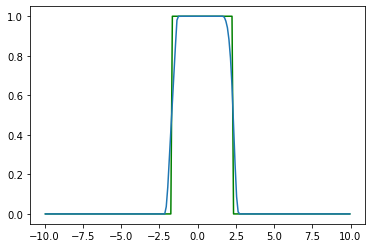

time:  0.30303030303030304


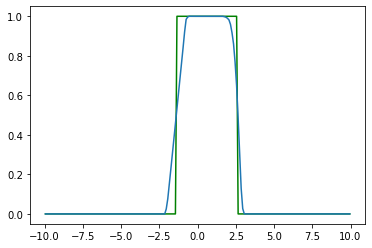

time:  0.6060606060606061


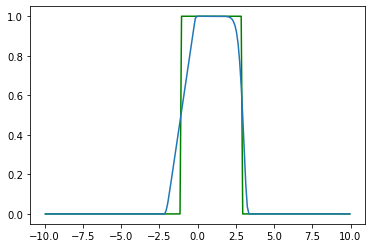

time:  0.9090909090909092


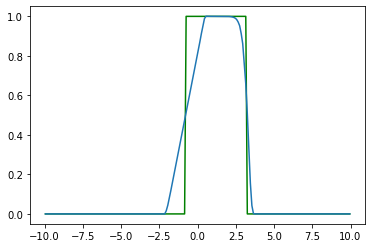

time:  1.2121212121212122


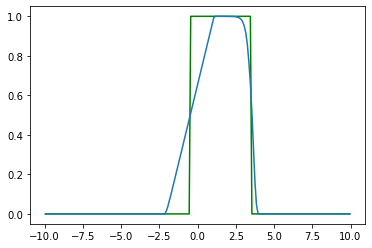

time:  1.5151515151515151


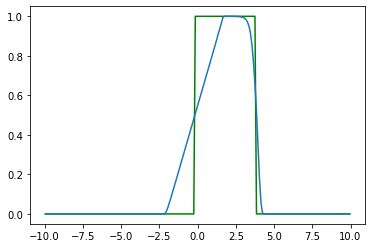

time:  1.8181818181818183


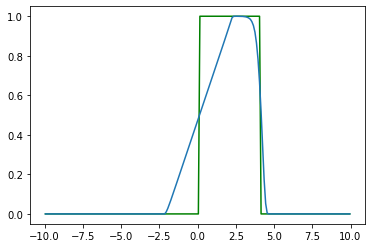

time:  2.121212121212121


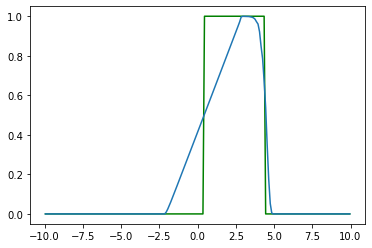

time:  2.4242424242424243


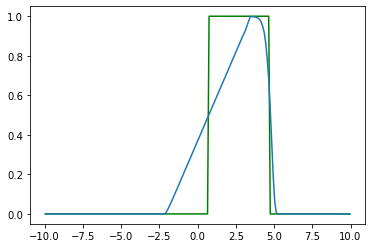

time:  2.7272727272727275


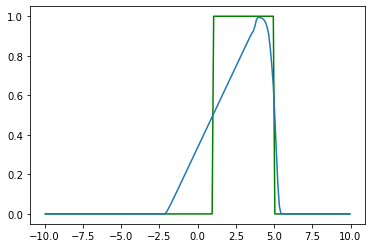

time:  3.0


In [2]:
import time
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

%matplotlib inline

N = 200
x = np.linspace(-10., 10., N+1)
N_t = 100
t = np.linspace(0, 3, N_t)

xc = 0.5*np.array(x[:-1]+x[1:])

dx = x[1] - x[0]

half_width = 2
height = 1
u0 = height*(np.heaviside(-xc + half_width, 0)*np.heaviside(xc + half_width, 0))

plt.plot(xc, u0)
plt.show()

start = time.time()  

def analytic_sol(x, t):
  v = 1 # velocity of square wave
  return height*(np.heaviside(xc - v*t + half_width, 0) - np.heaviside(xc - v*t - half_width, 0))

def minmod(a, b):
  minmod = (np.abs(a) < np.abs(b)).astype(int)
  minmod2 = (np.abs(b) < np.abs(a)).astype(int)
  return 1/2*(np.sign(a) + np.sign(b))*(minmod*np.abs(a) + minmod2*np.abs(b)) 

def superbee(a, b):
  s1 = minmod(2*a, b)
  s2 = minmod(a, 2*b)
  maxmod = (np.abs(s1) > np.abs(s2)).astype(int)
  maxmod2 = (np.abs(s2) > np.abs(s1)).astype(int)
  return (maxmod*np.abs(s1) + maxmod2*np.abs(s2)) 

def dudt(t, u):
  u = np.append(u[-1], np.append(u, u[0])) # periodic boundary conditions
  
  limiter = superbee((u[1:-1] - u[:-2])/dx, (u[2:] - u[1:-1])/dx)
  uLForw = u[0]
  uLCent = u[1:-1] + dx/2*limiter
  uL = np.append(uLForw, uLCent)
  
  uRBack = u[-1]
  uRCent = u[1:-1] - dx/2*limiter
  uR = np.append(uRCent, uRBack)

  # Flux
  FL = uL**2
  FR = uR**2
 
  # characteristic velocity
  FL_d = 2*uL
  FR_d = 2*uR
  
  prop = (np.abs(FL_d) >= np.abs(FR_d)).astype(int)*np.abs(FL_d) + (np.abs(FL_d) < np.abs(FR_d)).astype(int)*np.abs(FR_d)
    
  fu_interface = (FL + FR)/2 - prop/2*(uR - uL)

  dudt =  (fu_interface[:-1] - fu_interface[1:])/dx
  return dudt
  
def solution(u0):
    """https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html"""
    t_span = [t[0], t[-1]]
    sol = solve_ivp(dudt, t_span, u0, t_eval = t, method='RK45') # explicit Runge Kutta
    return sol.y

sol = solution(u0)

print(time.time()-start)

for i in range(0, N_t, int(N_t/10)):
    plt.plot(xc, analytic_sol(xc, t[i]), color='green')
    plt.plot(xc, sol[:,i])
    plt.show()
    print("time: ", t[i])

plt.plot(xc, analytic_sol(xc, t[-1]), color='green')
plt.plot(xc, sol[:,-1])
plt.show()
print("time: ", t[-1])
# print(sol[-1])

5.146309852600098


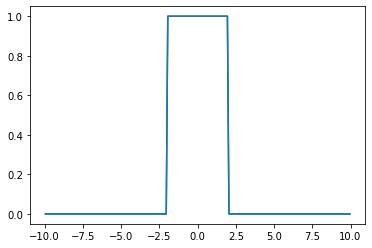

time:  0.0


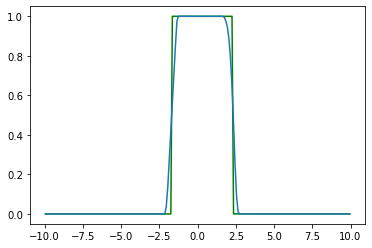

time:  0.30303030303030304


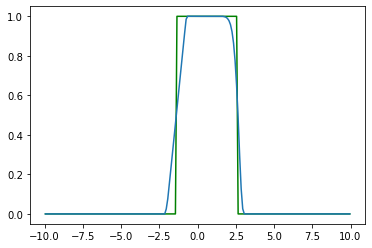

time:  0.6060606060606061


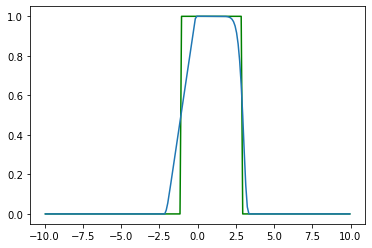

time:  0.9090909090909092


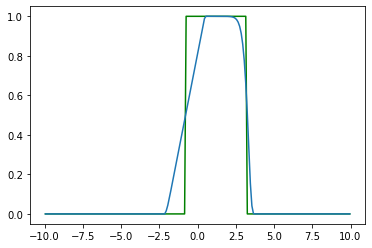

time:  1.2121212121212122


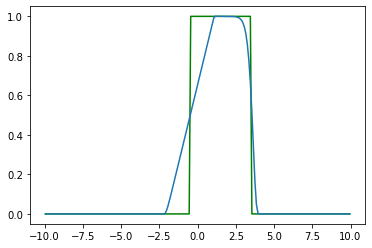

time:  1.5151515151515151


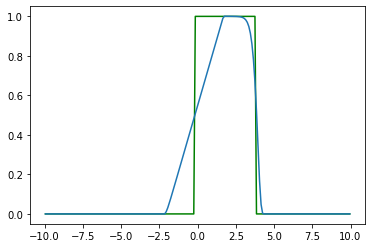

time:  1.8181818181818183


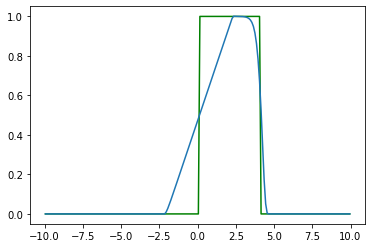

time:  2.121212121212121


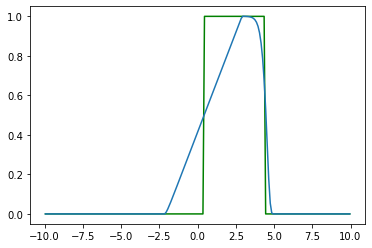

time:  2.4242424242424243


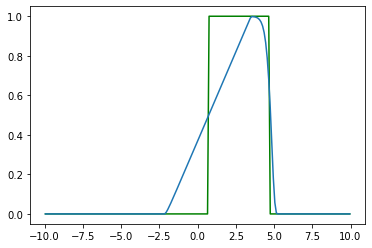

time:  2.7272727272727275


In [3]:
def solution2(u0):
    t_span = [t[0], t[-1]]
    sol = solve_ivp(dudt, t_span, u0, t_eval = t, method='Radau') # Implicit Runge Kutta
    return sol.y

sol = solution2(u0)

print(time.time()-start)

for i in range(0, N_t, int(N_t/10)):
    plt.plot(xc, analytic_sol(xc, t[i]), color='green')
    plt.plot(xc, sol[:,i])
    plt.show()
    print("time: ", t[i])

8.272396087646484


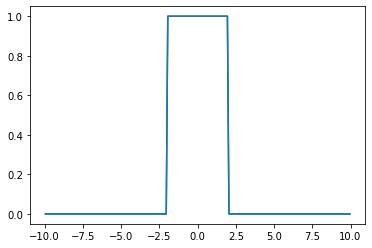

time:  0.0


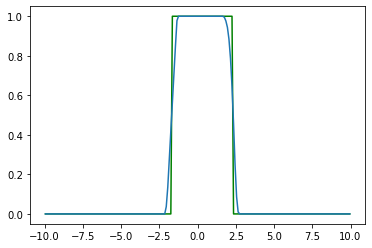

time:  0.30303030303030304


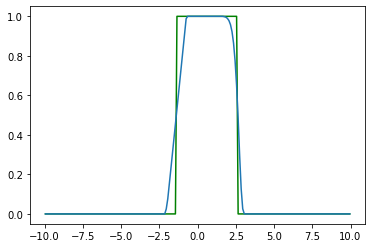

time:  0.6060606060606061


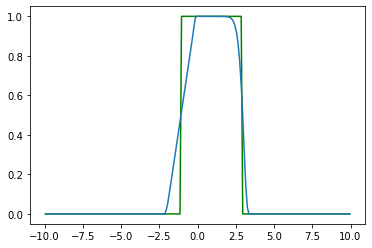

time:  0.9090909090909092


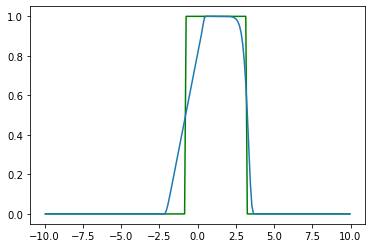

time:  1.2121212121212122


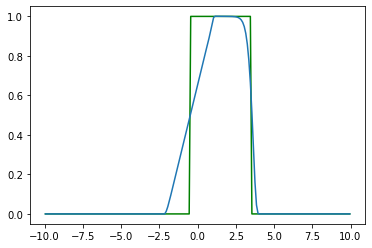

time:  1.5151515151515151


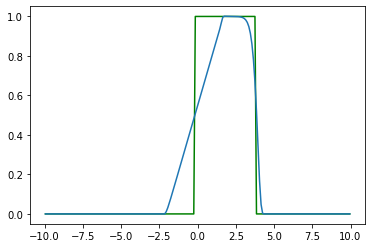

time:  1.8181818181818183


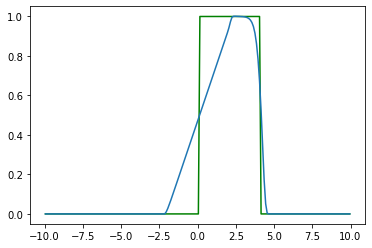

time:  2.121212121212121


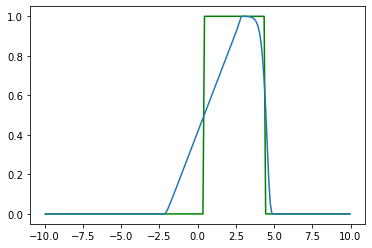

time:  2.4242424242424243


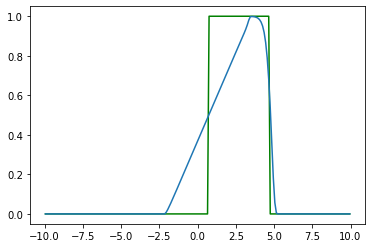

time:  2.7272727272727275


In [4]:
def solution3(u0):
    t_span = [t[0], t[-1]]
    sol = solve_ivp(dudt, t_span, u0, t_eval = t, method='BDF') # Implicit Euler(?)
    return sol.y

sol = solution3(u0)

print(time.time()-start)

for i in range(0, N_t, int(N_t/10)):
    plt.plot(xc, analytic_sol(xc, t[i]), color='green')
    plt.plot(xc, sol[:,i])
    plt.show()
    print("time: ", t[i])